<a href="https://colab.research.google.com/github/sambit-05/project_Liver_Cirrhosis/blob/main/LC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/drive/My Drive/Datasets/cirrhosis.csv")

In [ ]:
df

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0         Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1         Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2         N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3         Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4         Y     N        3.4        279.0     3.53   143.0     671.0  113.15   
..      ...   ...        ...          ...      ...     ...       ...     ...   
413     NaN     N        1.2          NaN     2.96     NaN       NaN     NaN   
414     NaN     N        0.9          NaN     3.83     NaN       NaN     NaN   
415     NaN     N        1.6          NaN     3.42     NaN       NaN     NaN   
416     NaN     N        0.8          NaN     3.75     NaN       NaN     NaN   
417     NaN     N        0.7          NaN     3.29     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413            NaN      174.0         10.9    3.0  
414            NaN      180.0         11.2    4.0  
415            NaN      143.0          9.9    3.0  
416            NaN      269.0         10.4    3.0  
417            NaN      350.0         10.6    4.0  

[418 rows x 20 columns]

In [ ]:
df.shape

(418, 20)

check data for gaps

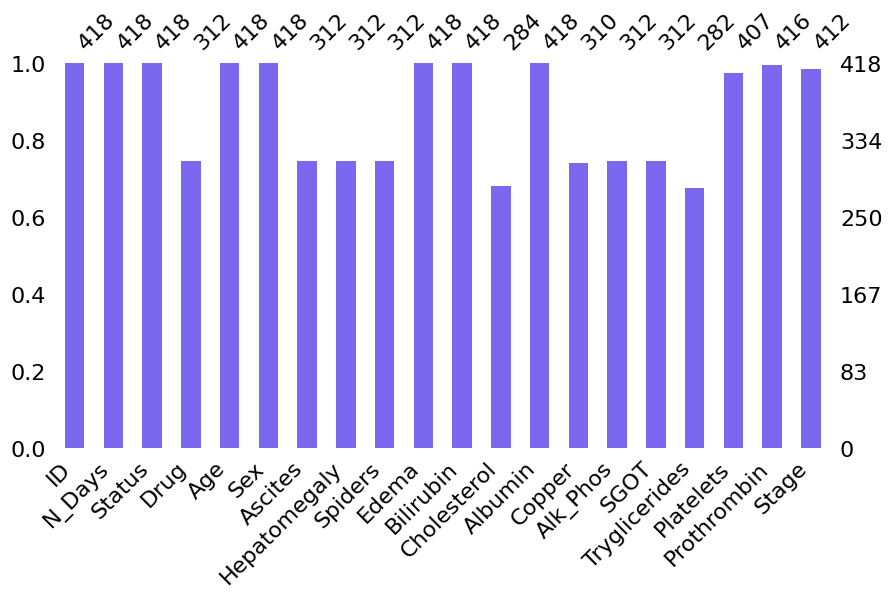

In [ ]:
msno.bar(df, figsize=(10,5), color="#7B68EE")
plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Tryglicerides    136
Cholesterol      134
Copper           108
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
SGOT             106
Alk_Phos         106
Platelets         11
Stage              6
Prothrombin        2
ID                 0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Bilirubin          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

Distribution of target variable

<Axes: xlabel='Status', ylabel='count'>

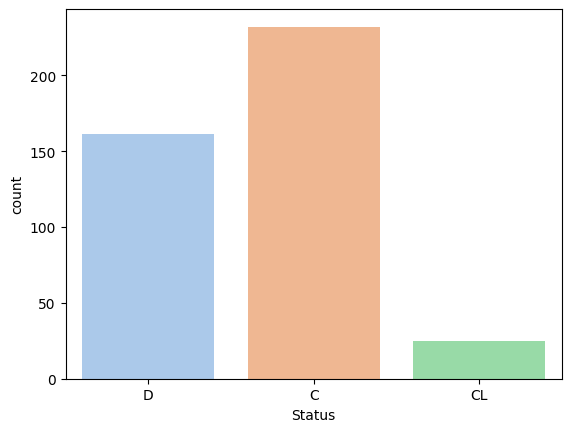

In [ ]:
sns.countplot(x = "Status", data=df, palette="pastel")

Uniqueness in variables

In [ ]:
for columns in df.columns:
  unique_values = len(df[columns].unique())
  print(f"{columns} has {unique_values} unique values")

ID has 418 unique values
N_Days has 399 unique values
Status has 3 unique values
Drug has 3 unique values
Age has 344 unique values
Sex has 2 unique values
Ascites has 3 unique values
Hepatomegaly has 3 unique values
Spiders has 3 unique values
Edema has 3 unique values
Bilirubin has 98 unique values
Cholesterol has 202 unique values
Albumin has 154 unique values
Copper has 159 unique values
Alk_Phos has 296 unique values
SGOT has 180 unique values
Tryglicerides has 147 unique values
Platelets has 244 unique values
Prothrombin has 49 unique values
Stage has 5 unique values


Categorizing data into numerical and categorical

In [ ]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
numeric = ['ID', 'N_Days','Age','Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage']
categorical = ["Status","Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

Analyss of numerical values

Text(0.5, 0.98, 'Visualizing continuous columns (df dataset)')

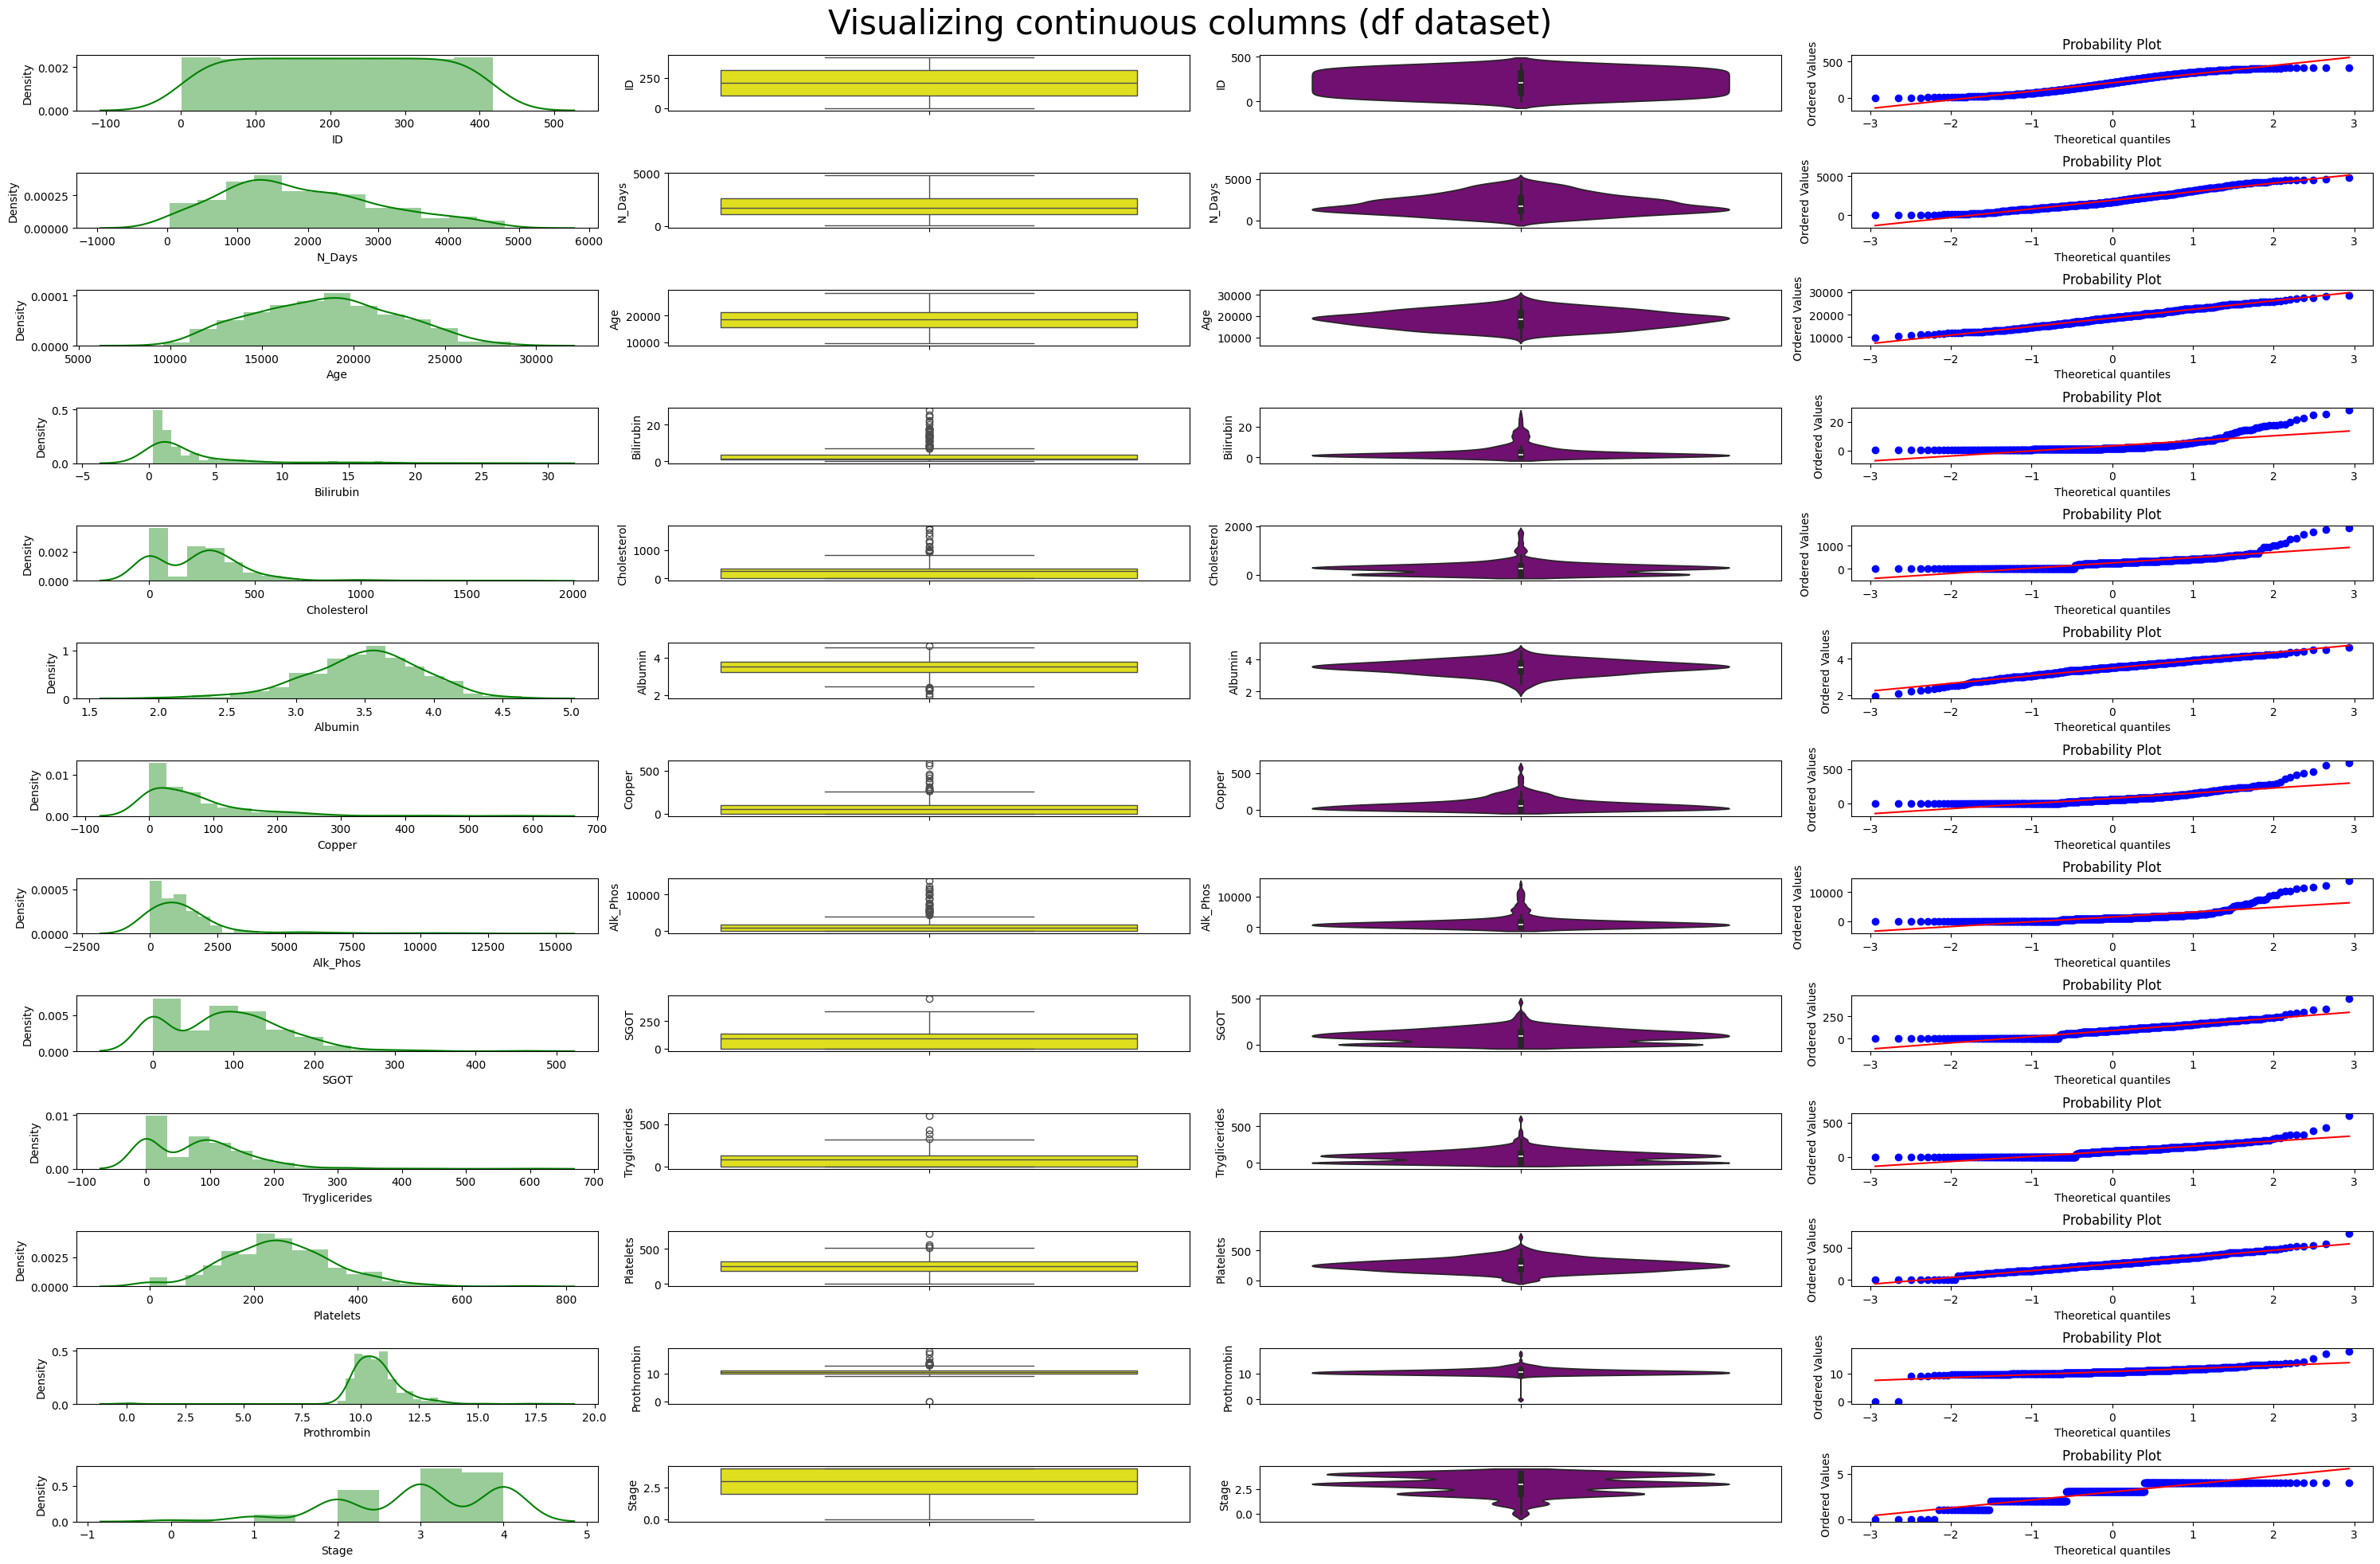

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric),4,figsize=(30,20))
for index,i in enumerate(numeric):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,3])
    fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (df dataset)",fontsize=30)

Analysis of status variable wrt to categorical features

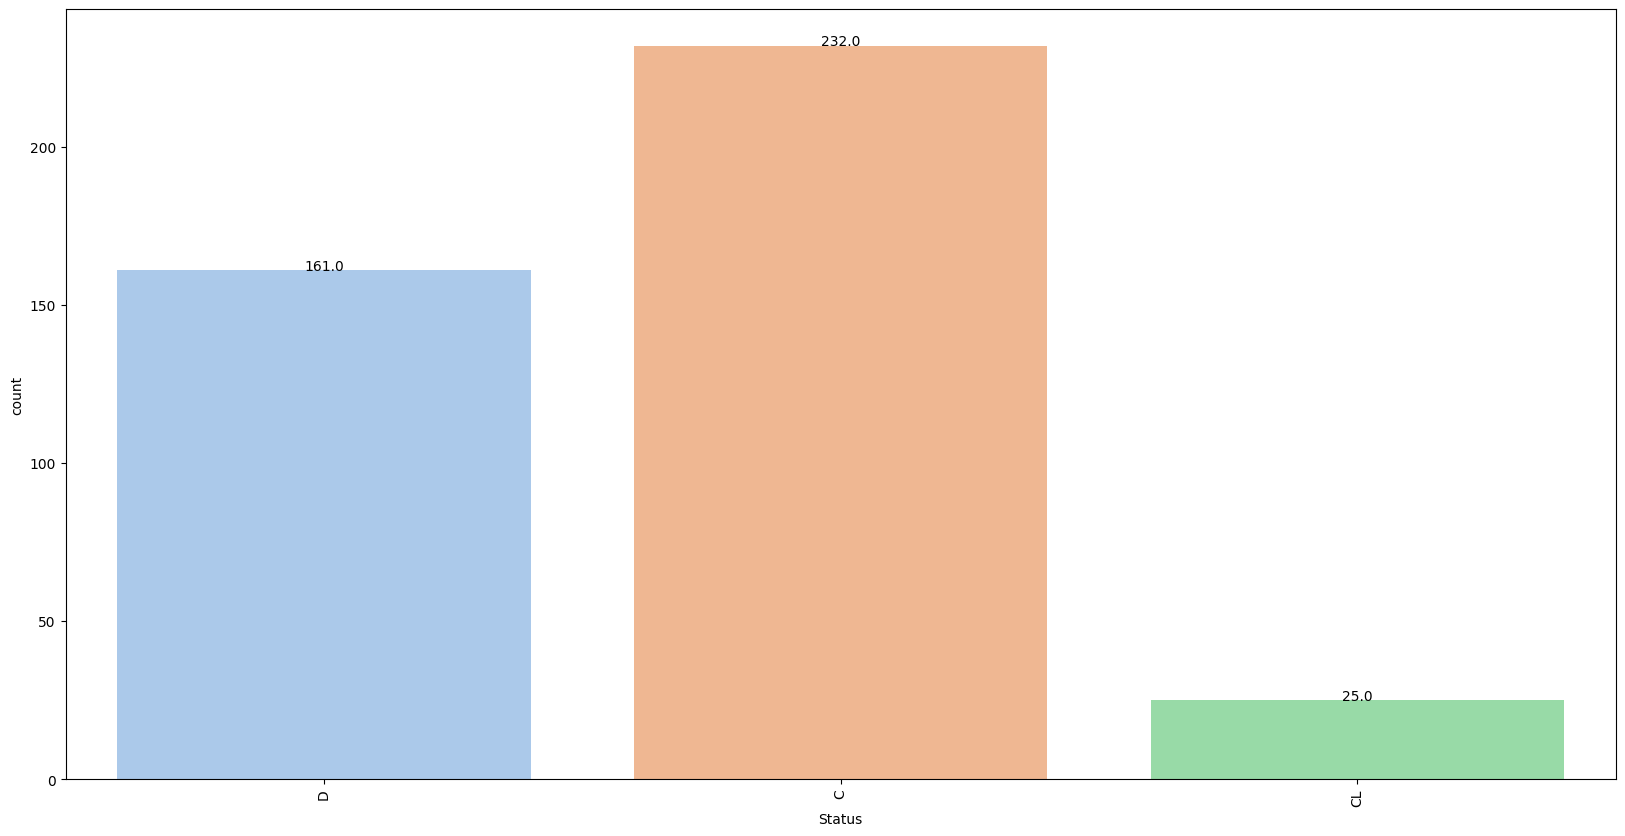

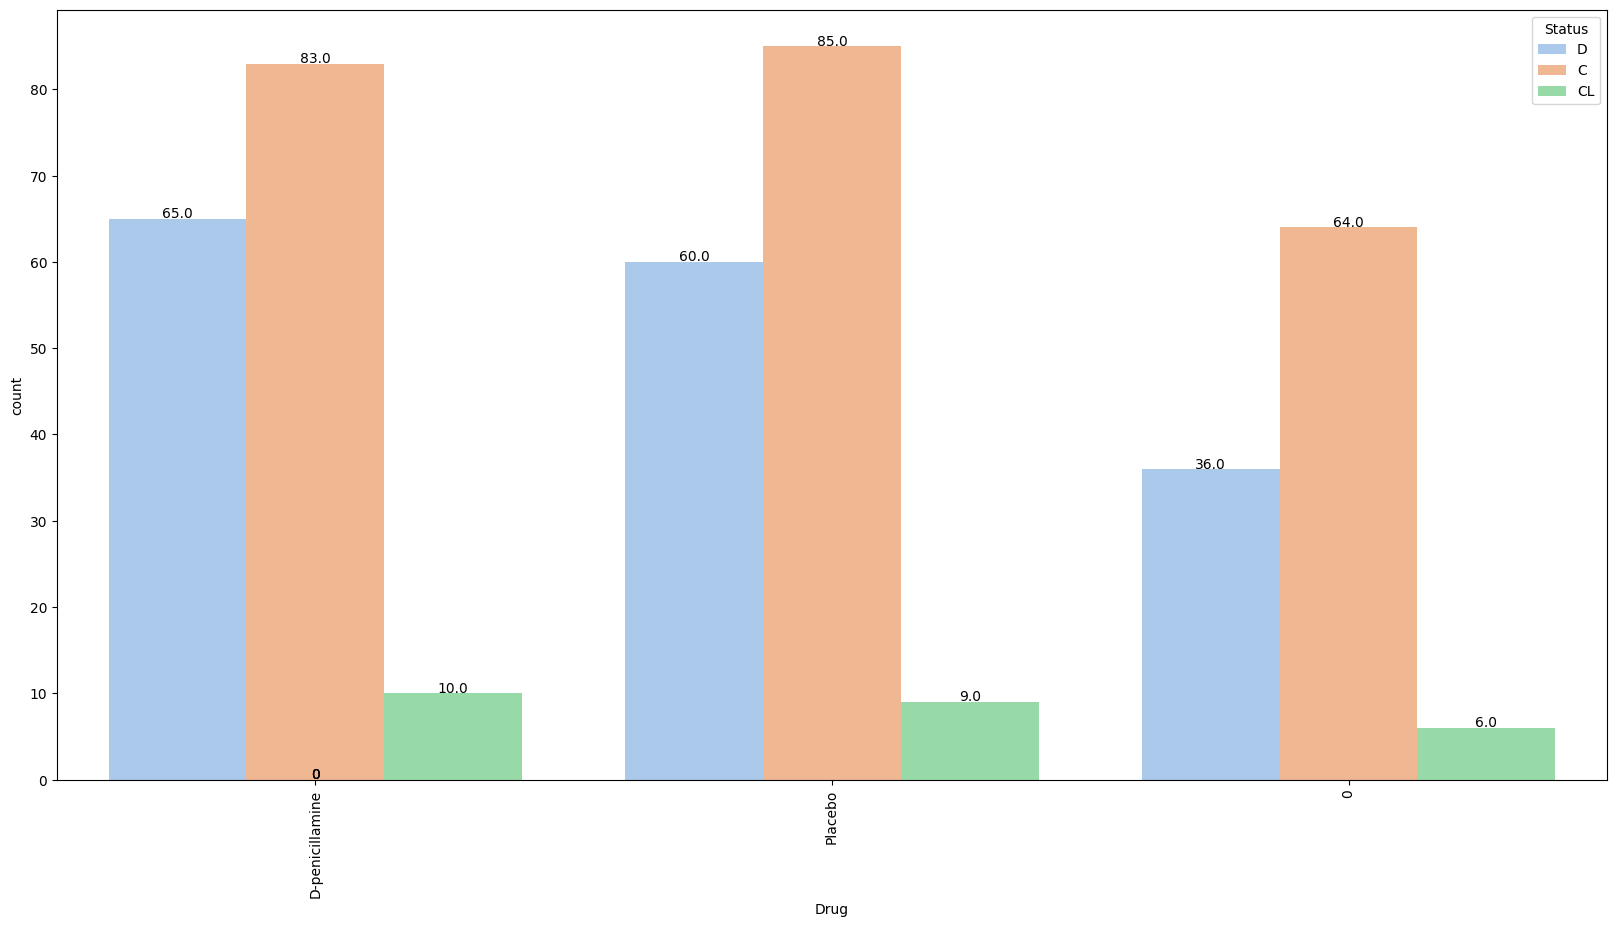

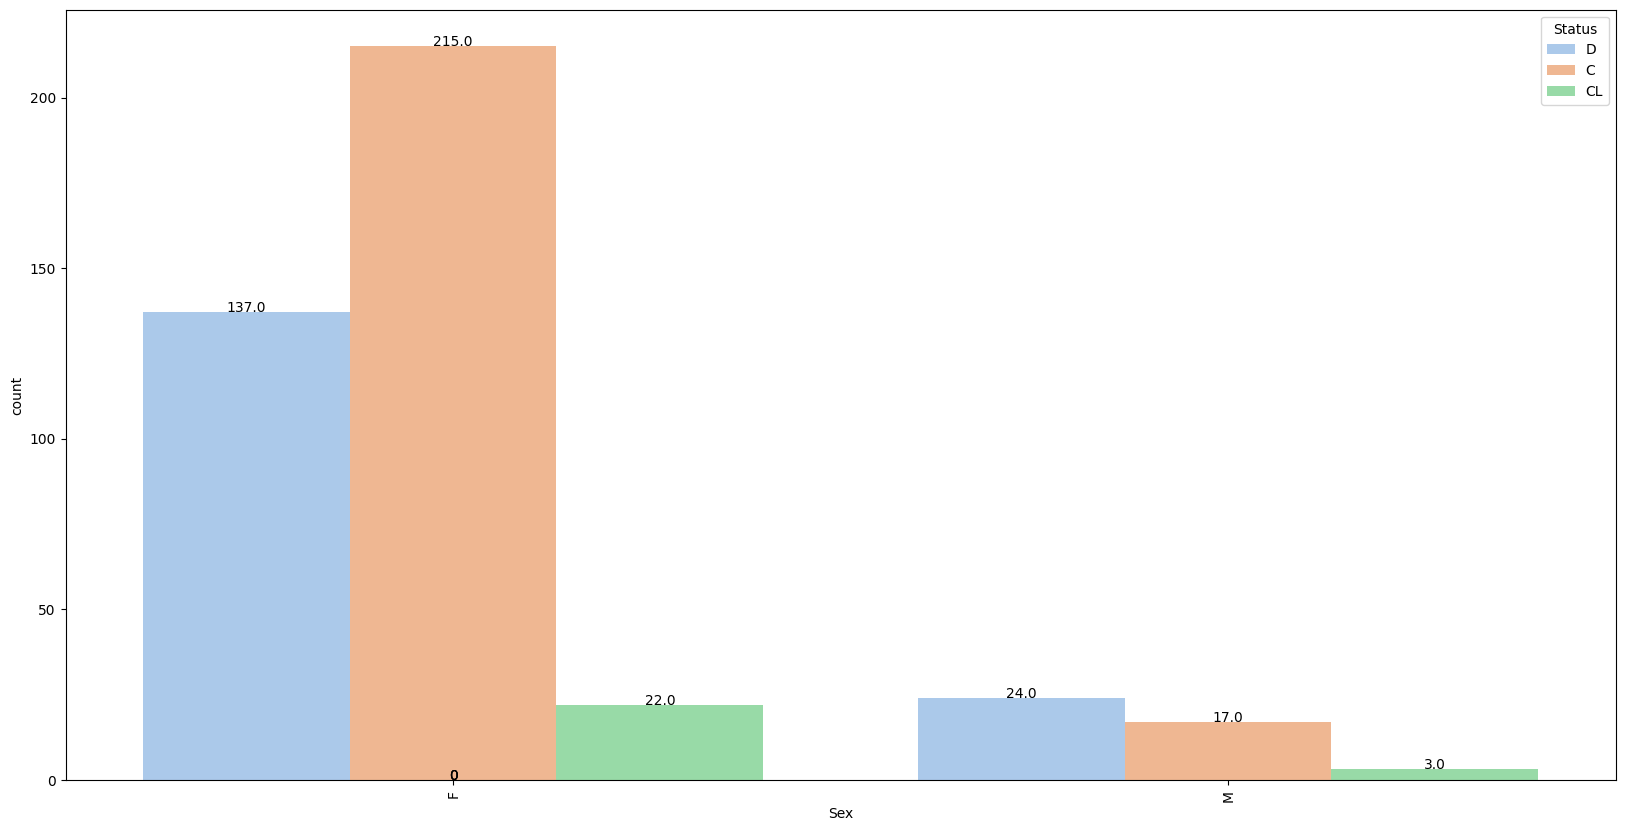

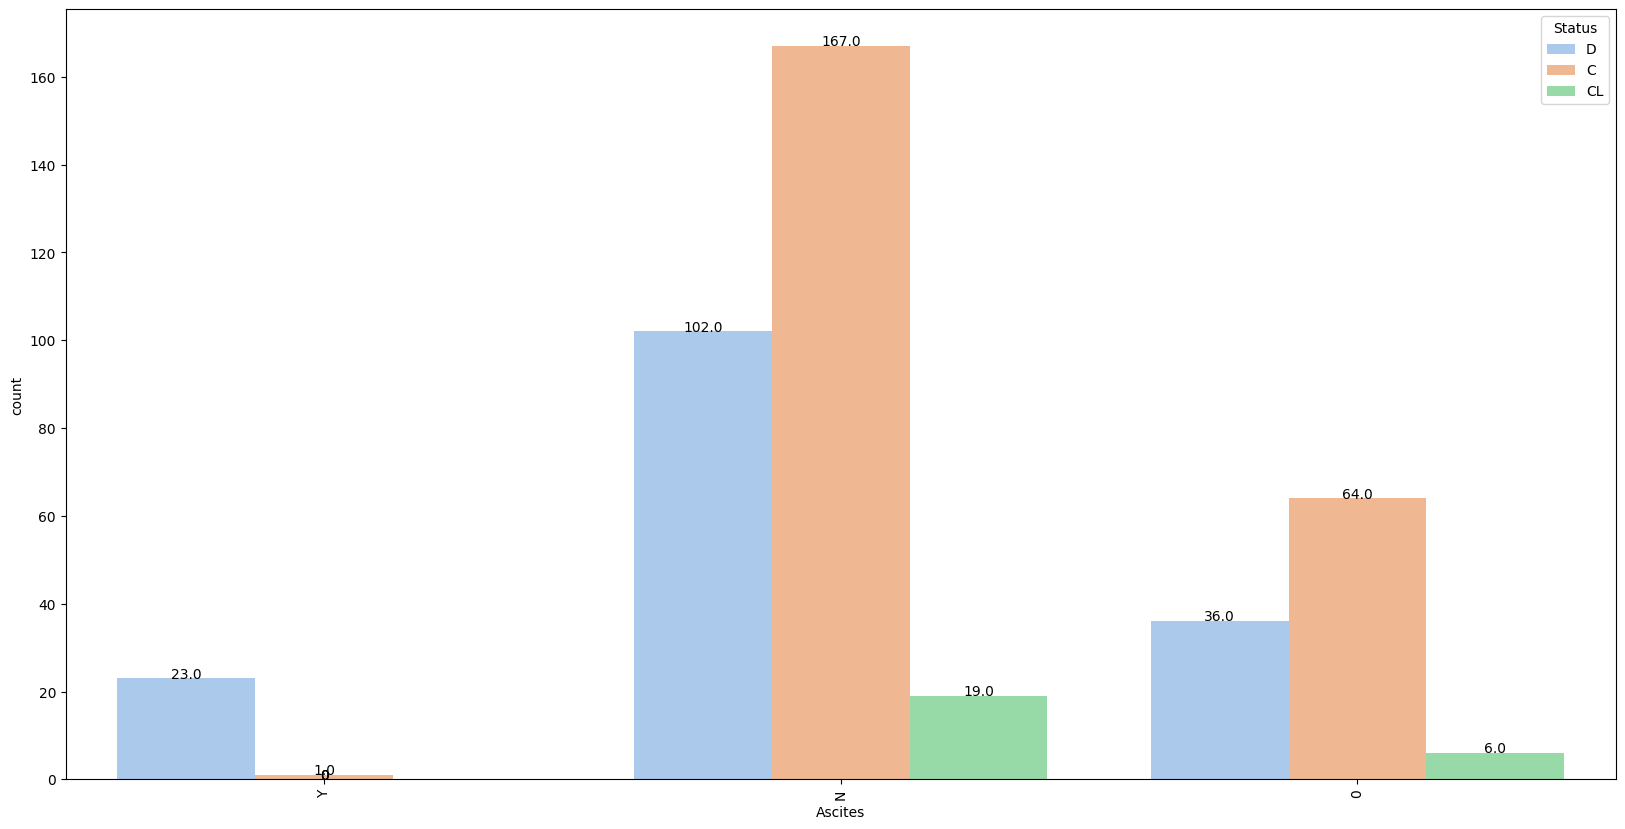

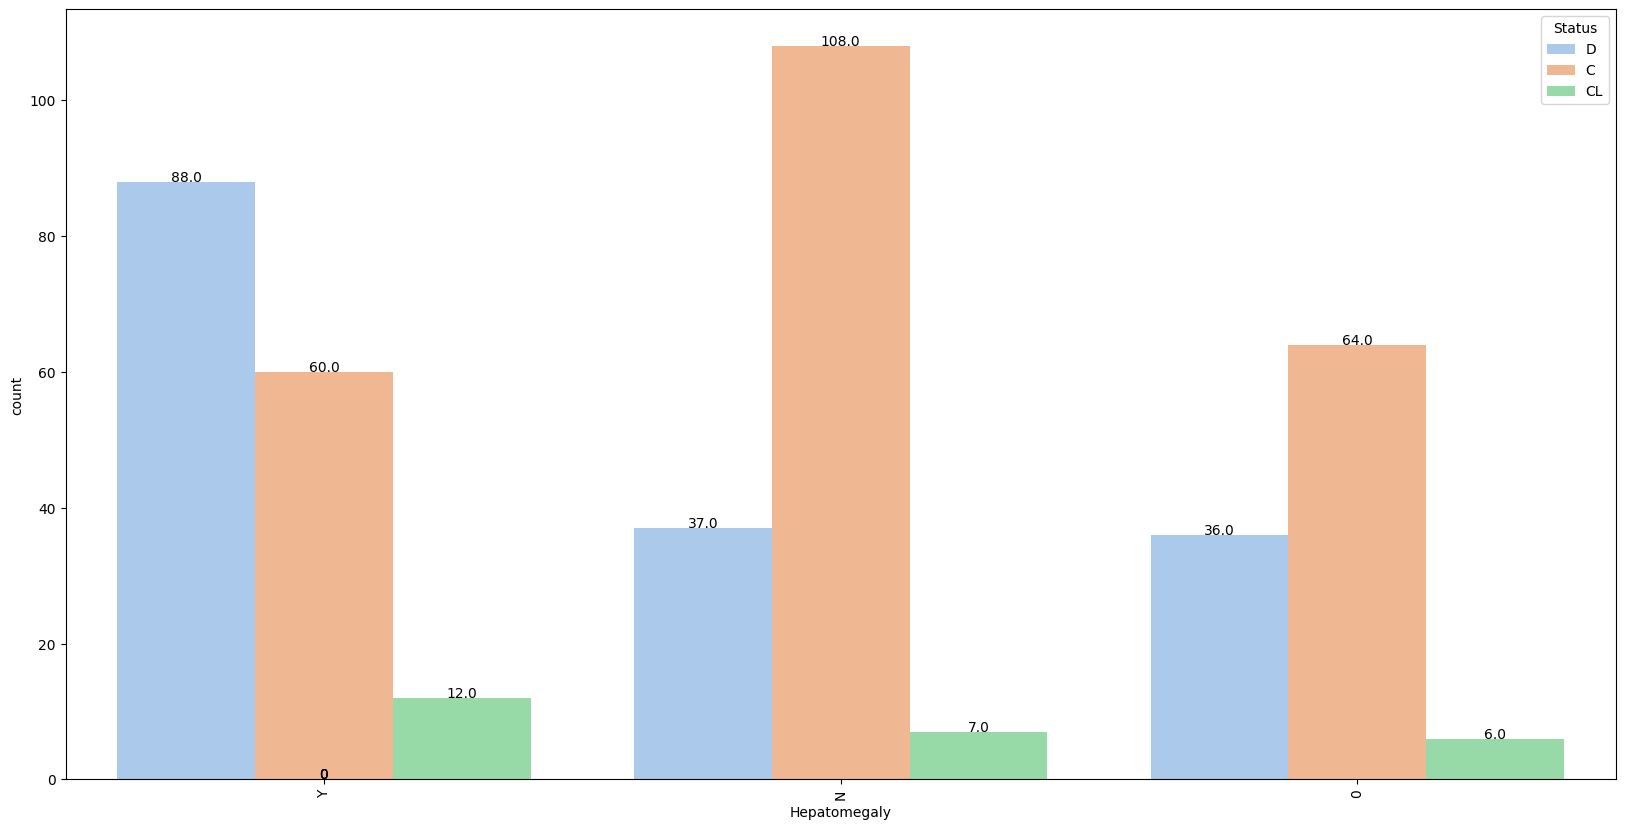

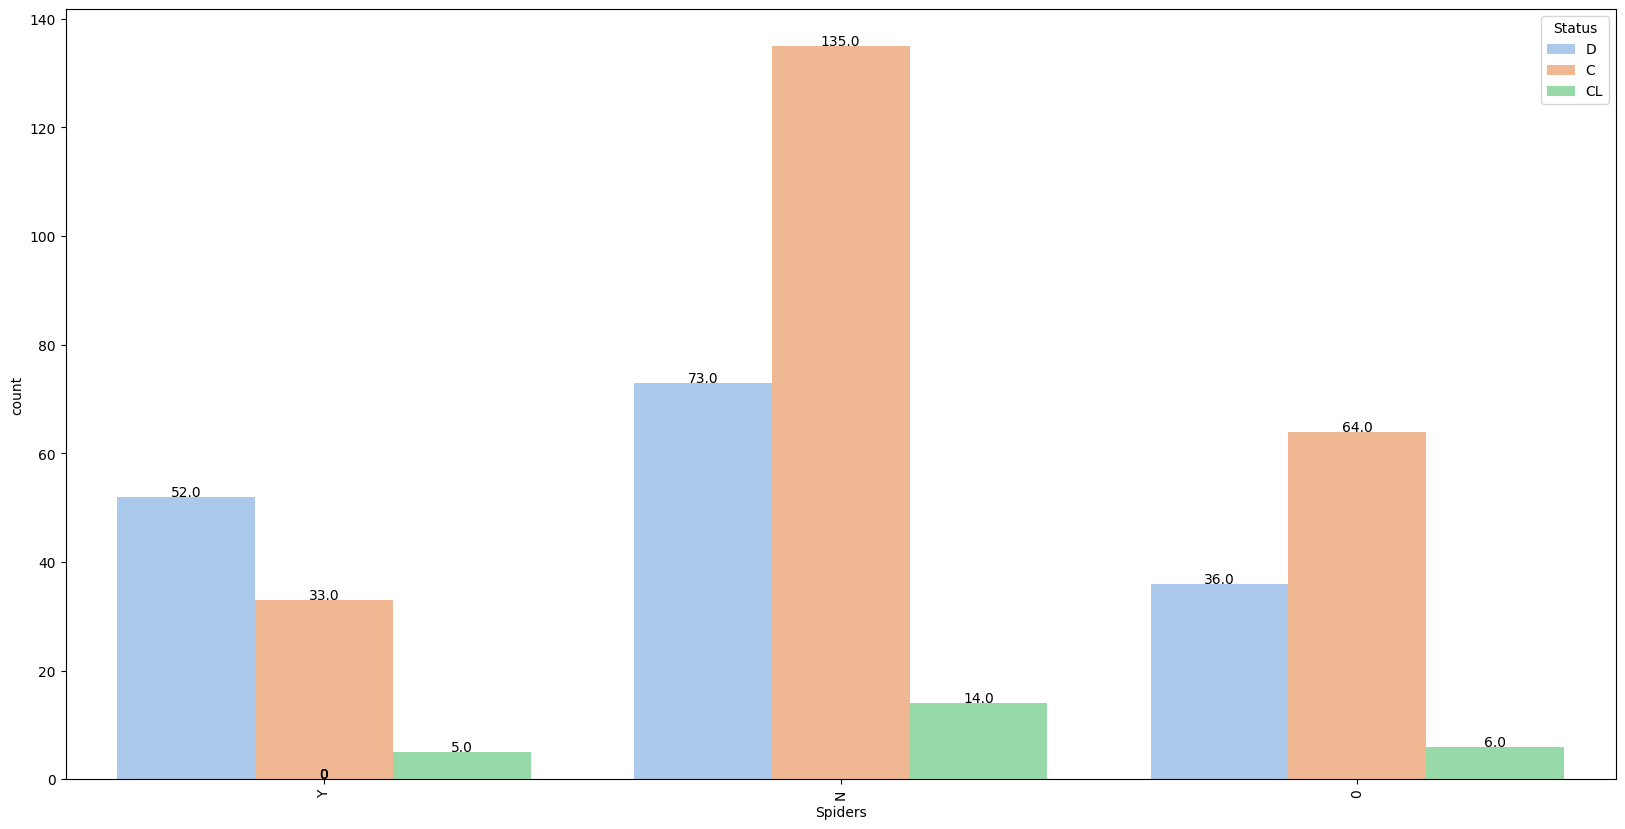

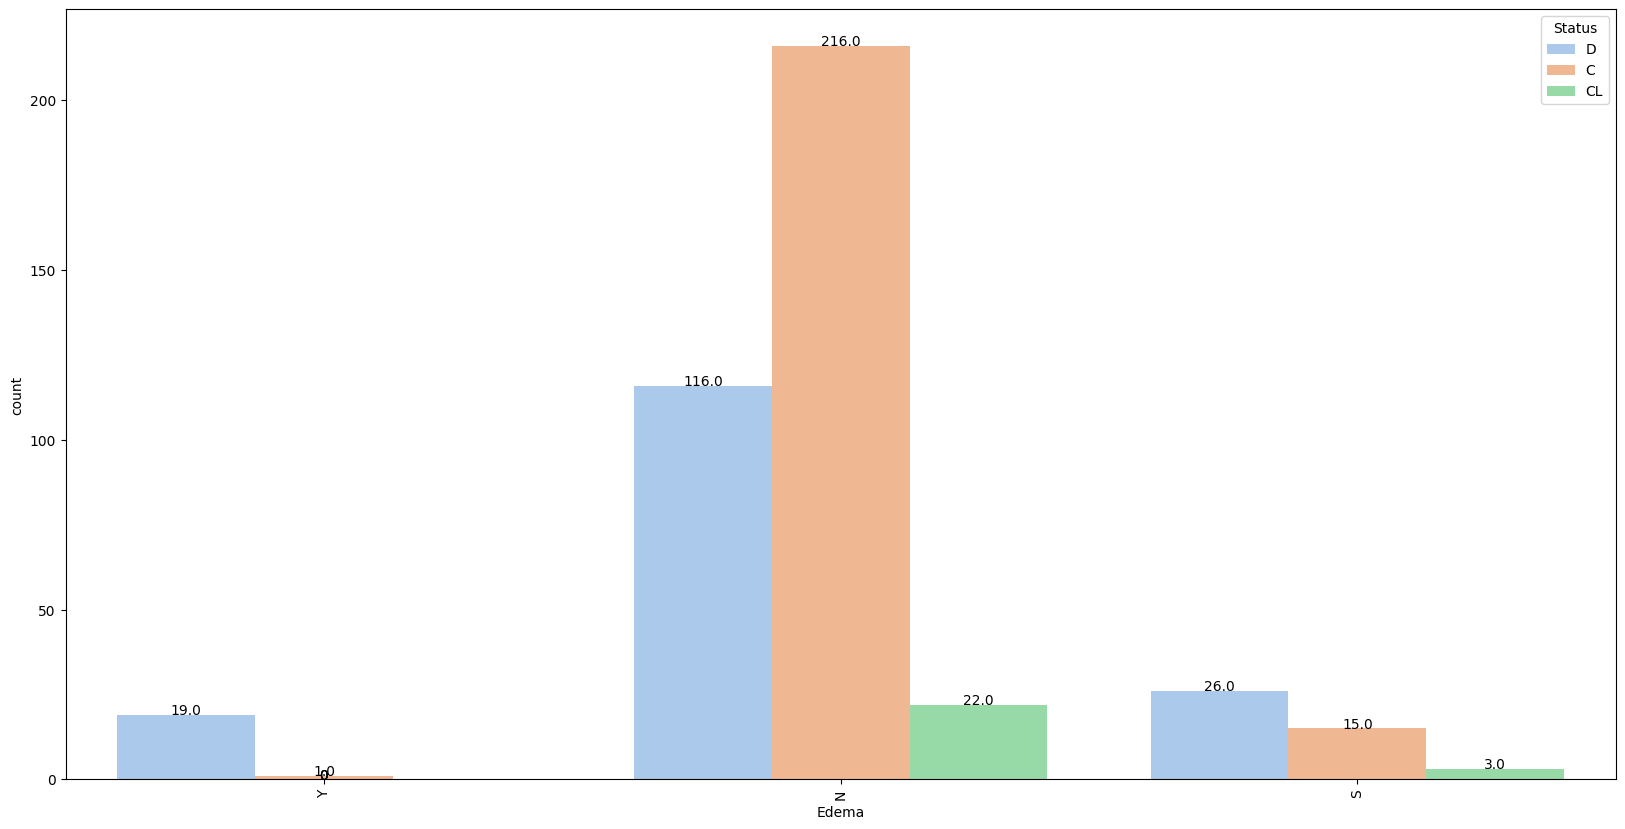

In [ ]:
for feature in categorical:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = df,hue='Status',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

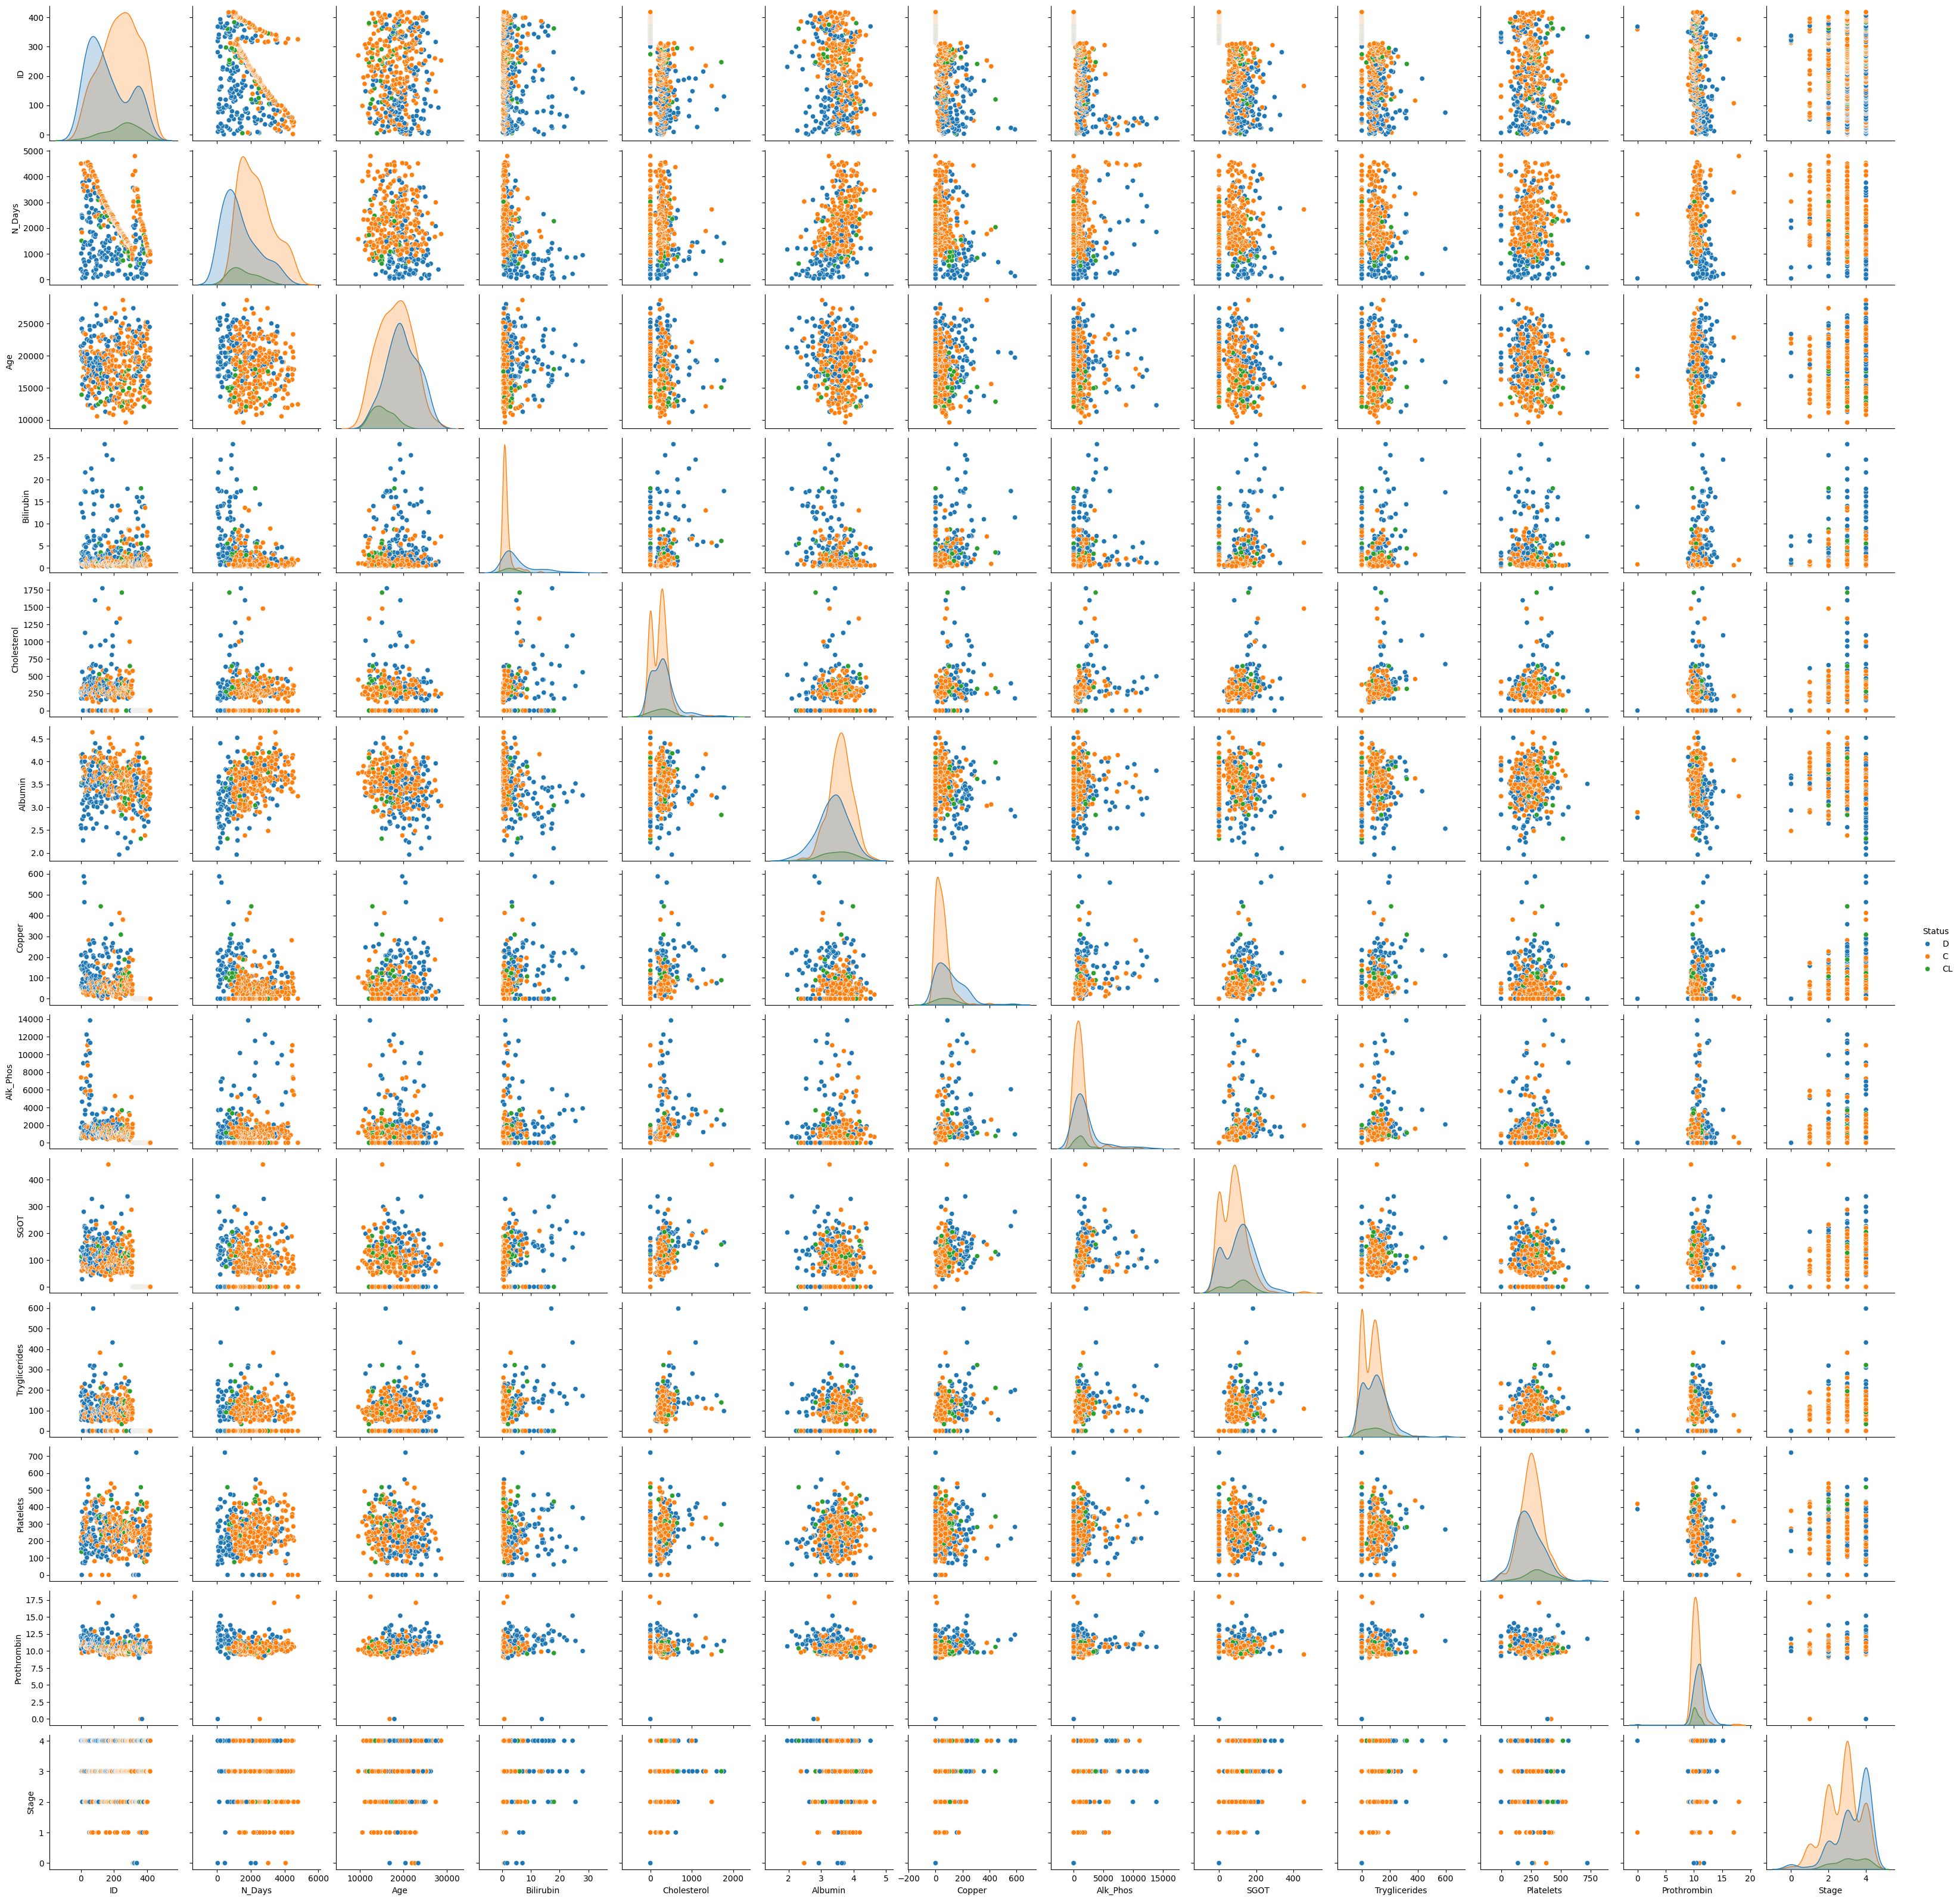

In [ ]:
sns.pairplot(df, hue = "Status")

Outliers in numerical variables wrt to some factores such as Sex and Drug

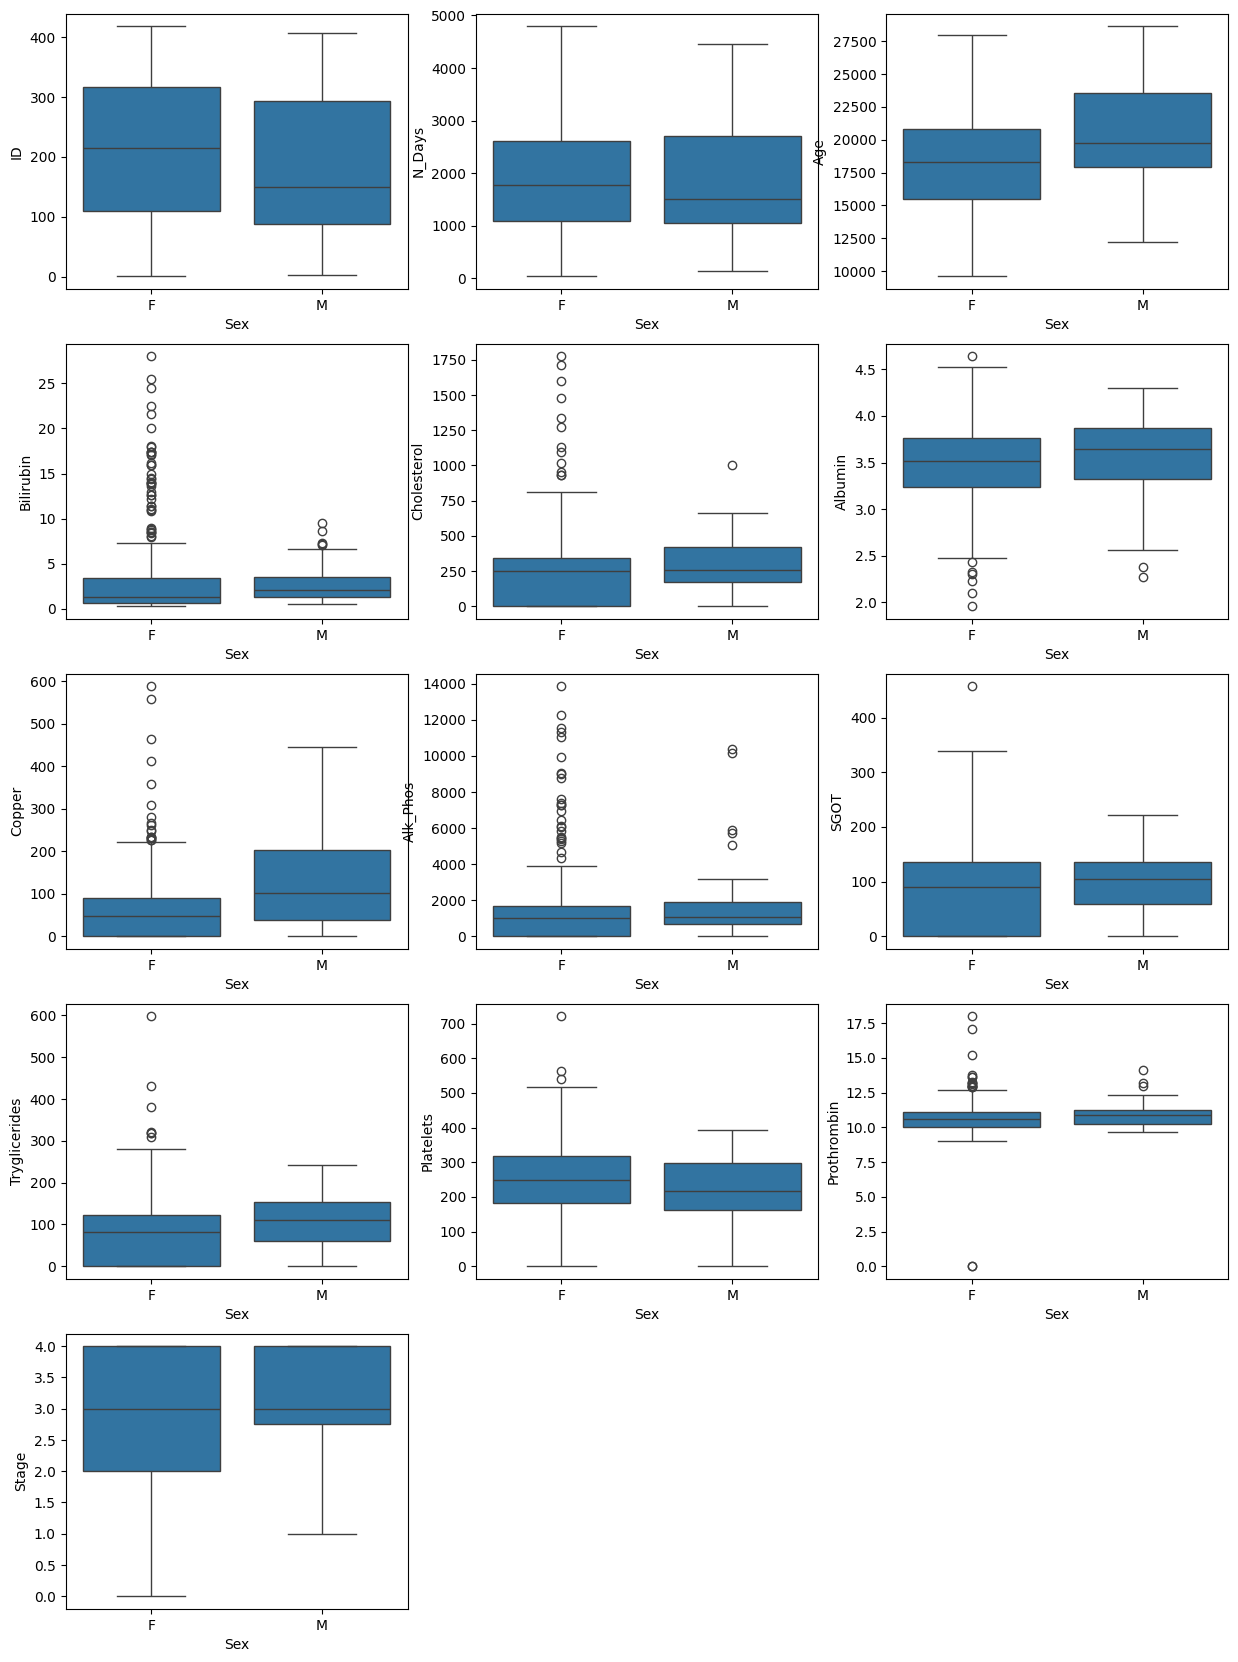

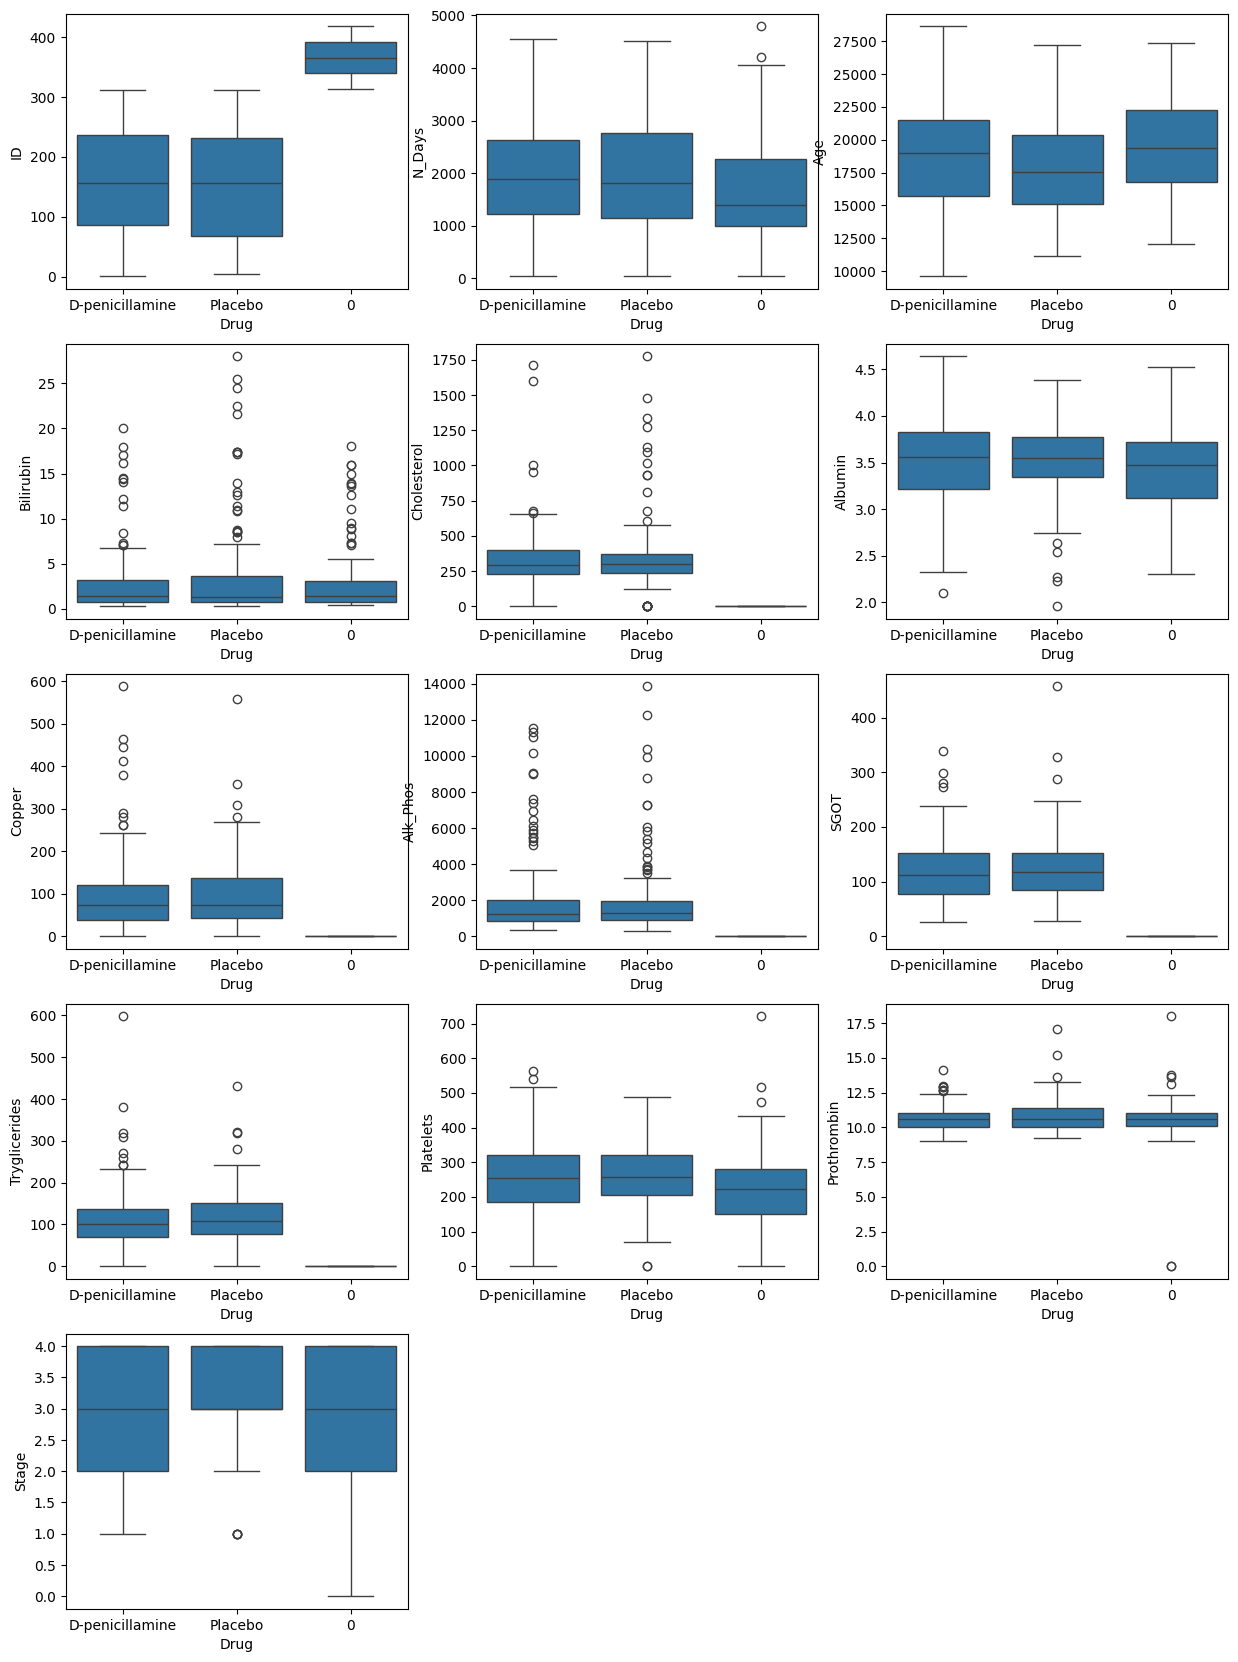

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x =df['Sex'])
    i+=1

i=1
plt.figure(figsize=(15,25))
for feature in numeric:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature], x = df['Drug'])
    i+=1

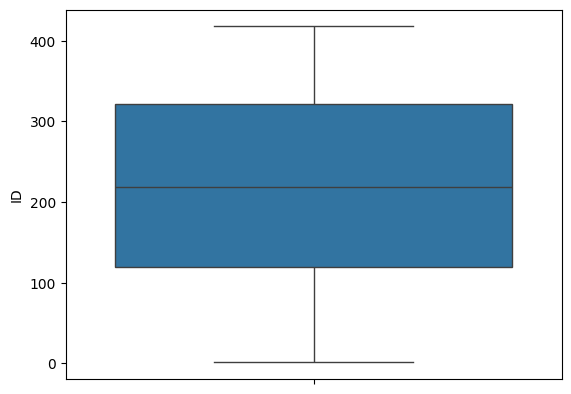

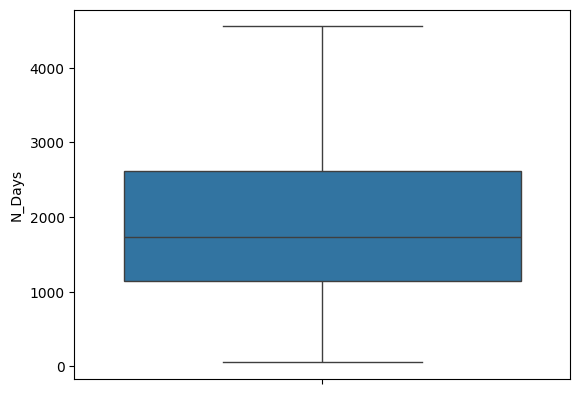

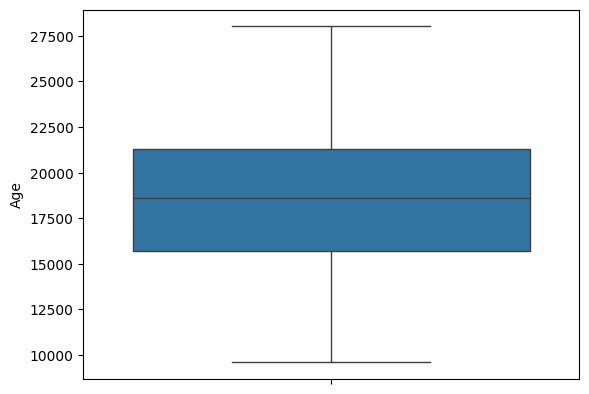

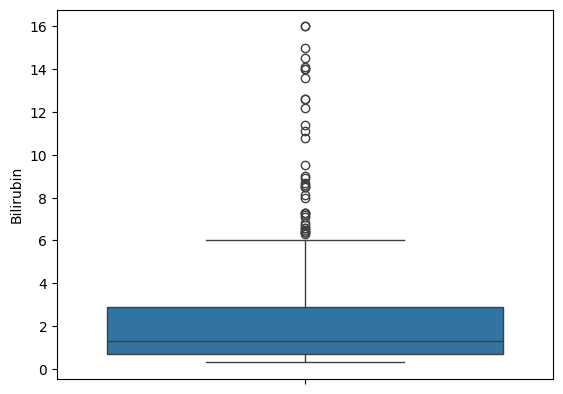

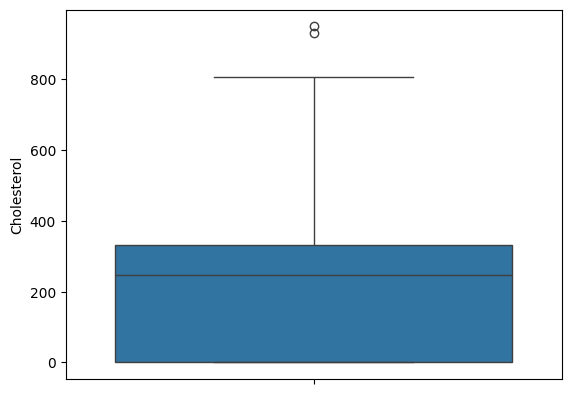

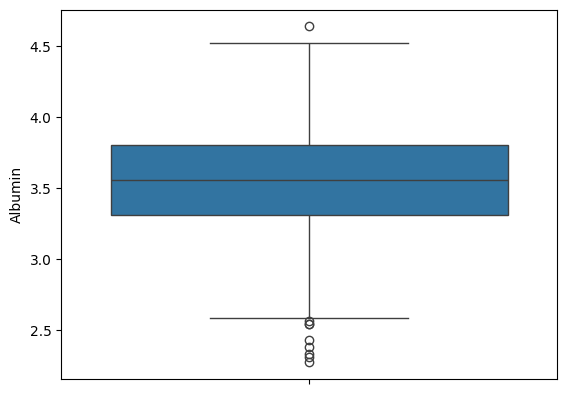

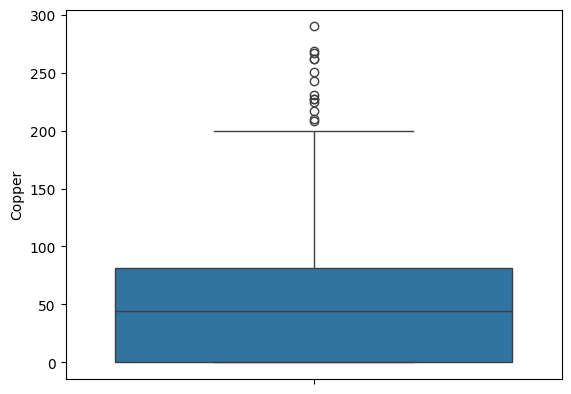

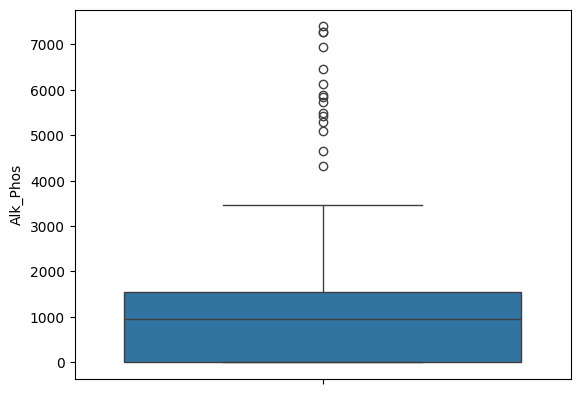

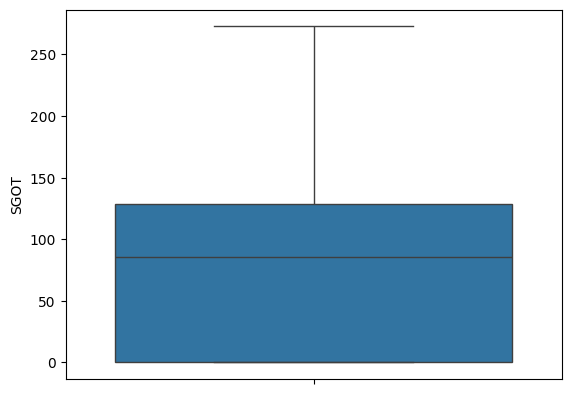

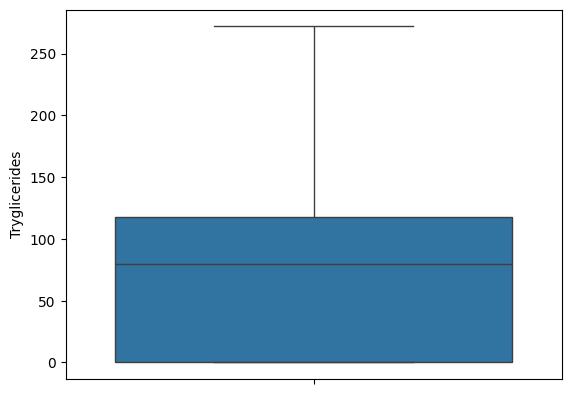

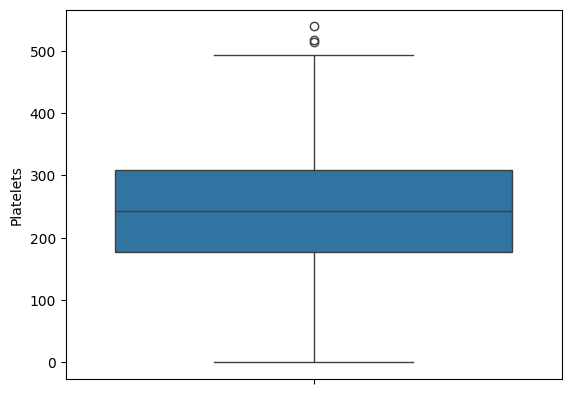

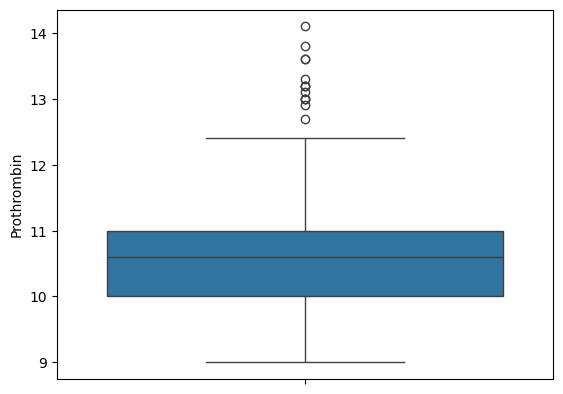

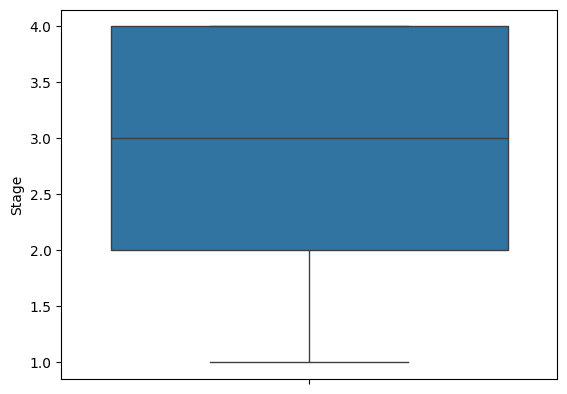

In [ ]:
from scipy import stats

for column in numeric:  # 'numeric' is your list of numerical columns
    z_scores = np.abs(stats.zscore(df[column]))  # Calculate absolute Z-scores
    threshold = 3  # Set your desired threshold

    # Filter data based on Z-scores
    df = df[(z_scores < threshold)]
for c in numeric:
    sns.boxplot(df[c])
    plt.show()

# Statistical Testing

Encoding the categorical variables

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

# Convert all categorical columns to strings before fitting the encoder
for col in categorical:
    df[col] = df[col].astype(str)

enc.fit(df[categorical])
df[categorical] = enc.transform(df[categorical])

In [ ]:
df.head()

ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0   1     400     2.0   1.0  21464  0.0      2.0           2.0      2.0   
1   2    4500     0.0   1.0  20617  0.0      1.0           2.0      2.0   
2   3    1012     2.0   1.0  25594  1.0      1.0           1.0      1.0   
3   4    1925     2.0   1.0  19994  0.0      1.0           2.0      2.0   
4   5    1504     1.0   2.0  13918  0.0      1.0           2.0      2.0   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0    2.0       14.5        261.0     2.60   156.0    1718.0  137.95   
1    0.0        1.1        302.0     4.14    54.0    7394.8  113.52   
2    1.0        1.4        176.0     3.48   210.0     516.0   96.10   
3    1.0        1.8        244.0     2.54    64.0    6121.8   60.63   
4    0.0        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

Normality test of numeric variables

In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric:
	stat, p = shapiro(df[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.989, p=0.009
Sample does not look Gaussian (reject H0)
Statistics=0.660, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.889, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.991, p=0.025
Sample does not look Gaussian (reject H0)
Statistics=0.853, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.744, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.931, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.903, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.992, p=0.044
Sample does not look Gaussian (reject H0)
Statistics=0.925, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.845, p=0.000
Sample does not look Gaussian (reject H0)


The sample does not pass the normality test hence we use chi-square test and defining the null hypothesis i.e. there is no relationship btw the variables and alternate hypothesis is that there is significant correlation between the two

In [ ]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(df[feature],df['Status']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 1.6273977706839995e-154
Dependent (reject H0)
p value is 0.9168076050108158
Independent (H0 holds true)
p value is 0.001957599480314111
Dependent (reject H0)
p value is 1.227849527977565e-06
Dependent (reject H0)
p value is 6.6743478476609375e-06
Dependent (reject H0)
p value is 0.027721020049610263
Dependent (reject H0)
p value is 5.586151800978193e-07
Dependent (reject H0)


Major categorical values show a sigificant rlationship with the target variable hence we proceed with th orrelation table

In [ ]:
correlation = df.corr()
print(correlation['Status'].sort_values(ascending = False),'\n')

Status           1.000000
Bilirubin        0.422264
Prothrombin      0.408647
Stage            0.324860
Copper           0.307778
Edema            0.301951
Age              0.224392
Sex              0.184637
SGOT             0.182073
Hepatomegaly     0.174246
Alk_Phos         0.144651
Ascites          0.138900
Spiders          0.115810
Cholesterol      0.100012
Tryglicerides    0.065926
Drug            -0.002108
Platelets       -0.161900
ID              -0.237730
Albumin         -0.245183
N_Days          -0.397881
Name: Status, dtype: float64 



<Axes: >

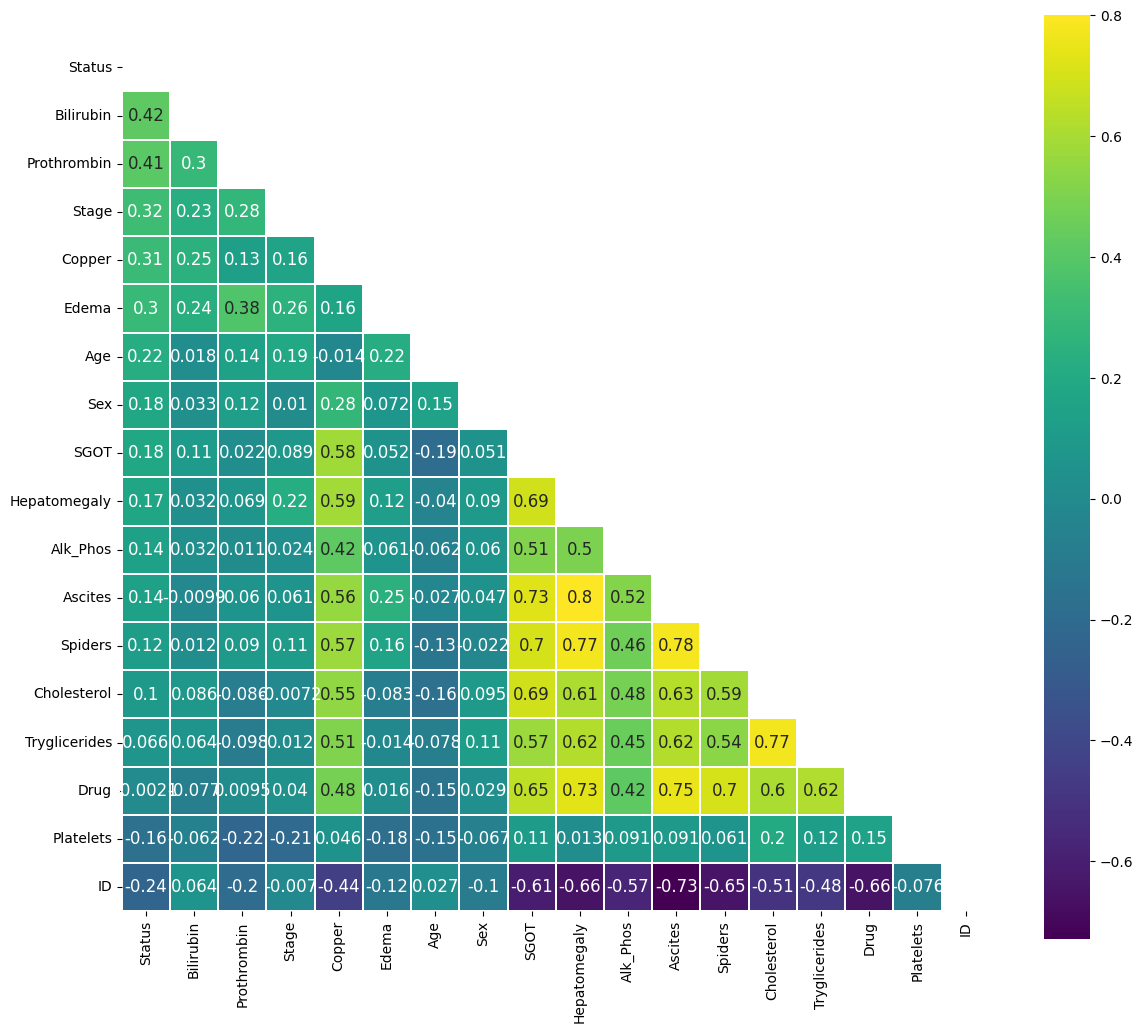

In [ ]:
k= 18
cols = correlation.nlargest(k,'Status')['Status'].index
cm = np.corrcoef(df[cols].values.T)

# Create the mask based on the shape of 'cm'
mask = np.triu(np.ones_like(cm)) # Change here

f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [ ]:
y=df['Status']
df.drop('Status',axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(df,y,test_size=0.1,random_state=42)

In [ ]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    # Specify 'average' parameter for multiclass classification
    print(f'Precission_score: {precision_score(y_test,y_pred, average="weighted")}') # Changed line
    print(f'Recall_score: {recall_score(y_test,y_pred, average="weighted")}') # Changed line
    print(f'F1-score: {f1_score(y_test,y_pred, average="weighted")}') # Changed line
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.6388888888888888
Precission_score: 0.5771604938271605
Recall_score: 0.6388888888888888
F1-score: 0.5853535353535354
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.7222222222222222
Precission_score: 0.6519230769230769
Recall_score: 0.7222222222222222
F1-score: 0.6689723320158103
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan,